In [1]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special
import matplotlib.pyplot as plt
%matplotlib inline

py.tools.set_credentials_file(username='toboa', api_key='ZdyIfyp9N9aHvcmAxnca')

py.offline.init_notebook_mode(connected=True) 

This is summary of data from 1950 :
 count     7.000000
mean      9.428571
std       0.786796
min       8.000000
25%       9.000000
50%      10.000000
75%      10.000000
max      10.000000
Name: month, dtype: float64


/Users/louis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.



<BarContainer object of 12 artists>

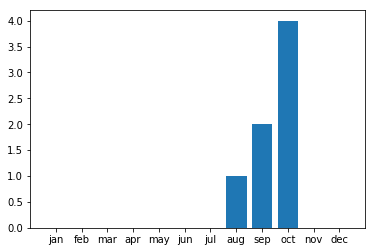

In [3]:
#imports the fungi_data
fungi_data = pd.read_csv("march6_mushroom.csv",  delimiter = "\t")

## NOTE: Drops the columns of data that are not useful to us.
fungi_clean = fungi_data.drop(['datasetKey', 'kingdom', 'phylum', 'order','class', 'taxonRank', 
                               'infraspecificEpithet', 'species','rightsHolder', 'license', 'mediaType', 
                               'issue','institutionCode', 'collectionCode','catalogNumber', 'recordNumber',
                               'identifiedBy', 'dateIdentified', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
                               'basisOfRecord',  'elevationAccuracy', 'depth', 'depthAccuracy', 'coordinatePrecision',
                               'elevation', 'countryCode', 'locality', 'eventDate', 'taxonKey','speciesKey', 'recordedBy',
                               'publishingOrgKey', 'gbifID', 'occurrenceID', 'day'], 
                              axis = 1)

fungi_clean = fungi_clean.sort_values('year')
year_num = 1950
# # the years with the most data are 1988 and 1993, with 233 and 244 data points reespectively
data_year = fungi_clean.loc[fungi_clean['year'] == year_num, 'month']
print("This is summary of data from", year_num, ":\n", data_year.describe())

def DataCall(year_num, month):
    data_year = fungi_clean.loc[fungi_clean['year'] == year_num, 'month']
    return data_year

months = []
month_names = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']


dataset = data_year
for i in range(12): 
    temporary_data = (data_year == i+1).sum()
    months = np.append(months, temporary_data)
plt.bar(month_names, months, width = .8)





# months = []
# month_names = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
# dataset = data1988
# for i in range(12): 
#     temporary_data = (data1988 == i+1).sum()
#     months = np.append(months, temporary_data)
# plt.bar(month_names, months, width = .8)

## Plotly!

In [4]:
# normalizes the data from the year (input) and outputs what percent of observation occured in each of the months
def DataCall(year_num):
    month_sum = np.zeros(13)
    
    data_year = fungi_clean.loc[fungi_clean['year'] == year_num, 'month']
    
    for i in range(1,13):
        month_sum[i-1] = sum(data_year == i)
        total_sum = sum(month_sum)
    normalized_data = (month_sum / total_sum *100)
    return normalized_data


In [5]:
#The plotly graph with slider

#this is axis and titles
layout = go.Layout(
    title='Mushroom occurance throughout the years',
    yaxis=dict(
        range=[0, 100]        
    )
)  
    
#### this is the function that is called to write the plot
def update_plot(years2):
    """
    This function updates the plot everytime a widget is changed
    """

    month_sum = DataCall(years2)
    trace1 = go.Bar(
        x=['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'October', 'November','December'],
        y=[ month_sum[1],month_sum[2],month_sum[3],month_sum[4],month_sum[5],month_sum[6],
          month_sum[7],month_sum[8],month_sum[9],month_sum[10],month_sum[11],month_sum[12]],
        marker=dict(
            color='rgb(158,202,225)',
            line=dict(
                color='rgb(8,48,107)',
                width=1.5,
            )
        ),
        opacity=0.6
    )
    data = [trace1]
    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)
    
years_slide = widgets.IntSlider(min=1950, max=2018, value=1, description='years')
widgets.interactive(update_plot, years2=years_slide)



interactive(children=(IntSlider(value=1950, description='years', max=2018, min=1950), Output()), _dom_classes=…

# Phong OG code 
#### (good shit!)

This is summary of data from 1988:
 count     7.000000
mean      9.428571
std       0.786796
min       8.000000
25%       9.000000
50%      10.000000
75%      10.000000
max      10.000000
Name: month, dtype: float64
This is summary of data from 1993:
 count    444.000000
mean       8.542793
std        0.911659
min        5.000000
25%        8.000000
50%        9.000000
75%        9.000000
max       11.000000
Name: month, dtype: float64


/Users/louis/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning:

invalid value encountered in greater_equal

/Users/louis/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning:

invalid value encountered in less_equal



<function matplotlib.pyplot.show(*args, **kw)>

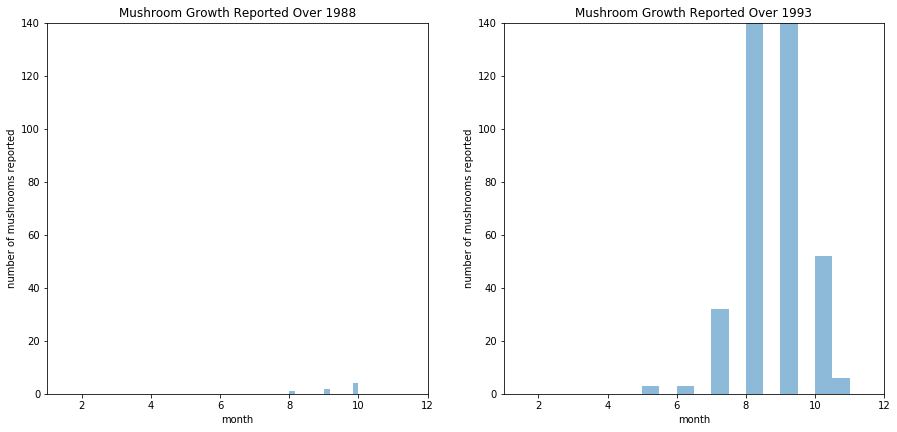

In [6]:
#imports the fungi_data
fungi_data = pd.read_csv("march6_mushroom.csv",  delimiter = "\t")

## NOTE: Drops the columns of data that are not useful to us.
#left in  
fungi_clean = fungi_data.drop(['datasetKey', 'kingdom', 'phylum', 'family','order','class', 'taxonRank', 
                               'infraspecificEpithet', 'species','rightsHolder', 'license', 'mediaType', 
                               'issue','institutionCode', 'collectionCode','catalogNumber', 'recordNumber',
                               'identifiedBy', 'dateIdentified', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
                               'basisOfRecord',  'elevationAccuracy', 'depth', 'depthAccuracy', 'coordinatePrecision',
                               'elevation', 'countryCode', 'locality', 'eventDate', 'taxonKey','speciesKey', 'recordedBy',
                               'publishingOrgKey', 'gbifID', 'occurrenceID', 'day'], 
                              axis = 1)

fungi_clean = fungi_clean.sort_values('year')

# the years with the most data are 1988 and 1993, with 233 and 244 data points reespectively
data1988 = fungi_clean.loc[fungi_clean['year'] == 1950, 'month']
data1993 = fungi_clean.loc[fungi_clean['year'] == 1993, 'month']

print("This is summary of data from 1988:\n", data1988.describe())

print("This is summary of data from 1993:\n", data1993.describe())


#plots these years
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.hist(data1988,
         bins = 12,
        alpha = 0.5)

ax1.set(title = 'Mushroom Growth Reported Over 1988', 
        xlabel = 'month', 
        ylabel = 'number of mushrooms reported',
        xlim = [1,12],
        ylim = [0, 140]) 

ax2.hist(data1993,
         bins= 12,
        alpha = 0.5)

ax2.set(title = 'Mushroom Growth Reported Over 1993', 
        xlabel = 'month', 
        ylabel = 'number of mushrooms reported',
        xlim=[1,12],
        ylim = [0, 140]) 



plt.show

In [ ]:
years = np.arange(1950,2019)
store = []
for x in years:
    temp = fungi_clean.loc[fungi_clean['year'] == x]
    number_of_values = temp.shape[0]
    store = np.append(store,number_of_values)
# print(store)
# print(years) 

    